In [1]:
from utils.DataManager import DataManager
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from utils.Sampling import sampling_SMOTE
from utils.CrossValidation import CrossValidation
from utils.Metrics import calculate_metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data_manager = DataManager(r'C:\Users\vnaza\OneDrive\Documentos\Projetos\ClassifierCompetition\data\Train.xlsx')

In [3]:
X_train, X_test, y_train, y_test = data_manager.train_test_splits(0.7)

In [4]:
X_train_sampled, y_train_sampled = sampling_SMOTE(X_train, y_train)

In [5]:
SVM_model = SVC(random_state=0, probability=True)
cross_validation = CrossValidation(X_train_sampled, y_train_sampled, model=SVM_model, n_splits=5)

params = [{
    # 'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear'],  # Kernel type
    # 'degree': [3, 4, 5],  # Degree of the polynomial kernel function ('poly' kernel only)
    # 'gamma': ['scale', 'auto'],  # Kernel coefficient ('rbf', 'poly', and 'sigmoid' kernels only)
    # 'coef0': [0.0, 0.5, 1.0],  # Independent term in kernel function ('poly' and 'sigmoid' kernels only)
}]

best_model, best_params = cross_validation.grid_search(params=params, scoring='roc_auc')

SVM_model = SVC(random_state=0, probability=True).set_params(**best_params)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
SVC(kernel='linear', probability=True, random_state=0)


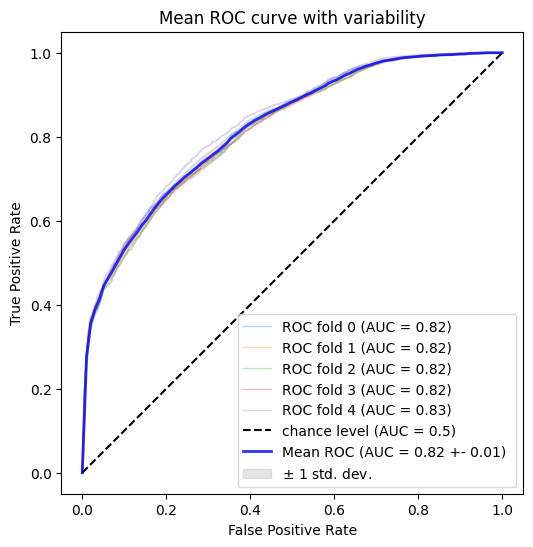

In [6]:
cross_validation.roc_cv_visualization(model=SVM_model)

In [9]:
yhat = SVM_model.predict(X_test)

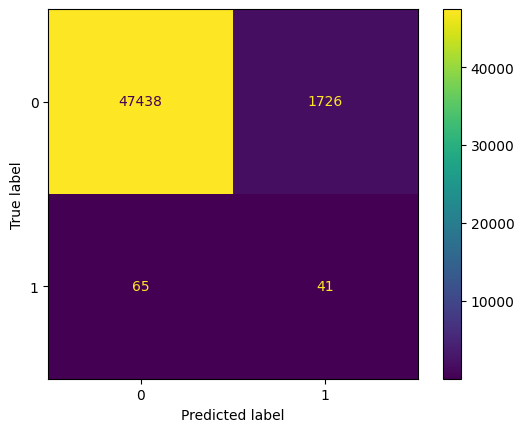

Classification Report for Unbalanced Series: 
                    pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.96      0.39      0.98      0.61      0.39     49164
          1       0.02      0.39      0.96      0.04      0.61      0.35       106

avg / total       1.00      0.96      0.39      0.98      0.61      0.39     49270

Balanced Accuracy Score: 0.68
Matthews Correlation Coefficient: 0.08762986894188782
ROC AUC Score: 0.7690235453768135


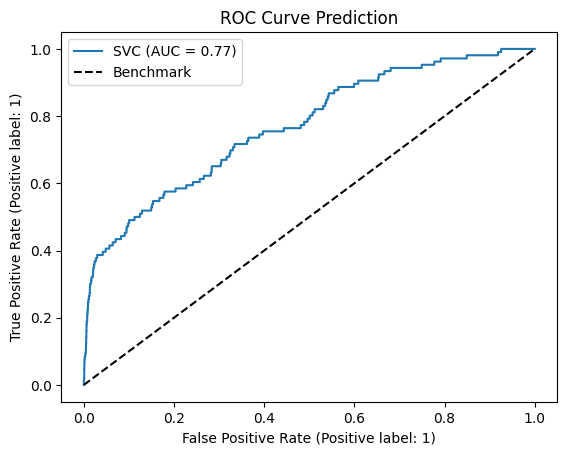

In [10]:
yhat = best_model.predict(X_test)
calculate_metrics(X_test, y_test, yhat, model=SVM_model)